In [1]:
!pip install plotly

In [2]:
!pip install cufflinks

In [3]:
!pip install folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_excel(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\Covid cases in India.xlsx')

In [4]:
df.head(4)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3


In [5]:
df.set_index('S. No.',inplace=True)

In [6]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
S. No.,,,,,
1,Andhra Pradesh,12,0,1,0
2,Chhattisgarh,6,0,0,0
3,Delhi,38,1,6,1
4,Gujarat,43,0,0,3
5,Haryana,16,14,11,0


In [7]:
df['Total']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [8]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total
S. No.,,,,,,
1,Andhra Pradesh,12,0,1,0,12
2,Chhattisgarh,6,0,0,0,6
3,Delhi,38,1,6,1,39
4,Gujarat,43,0,0,3,43
5,Haryana,16,14,11,0,30


In [9]:
print('Total active cases in INDIA',
    df.Total.sum())

Total active cases in INDIA 729


In [10]:
df['Remaining_ActiveTotal']=df['Total']-df['Cured']-df['Death']

In [11]:
df.head(4)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Remaining_ActiveTotal
S. No.,,,,,,,
1,Andhra Pradesh,12,0,1,0,12,11
2,Chhattisgarh,6,0,0,0,6,6
3,Delhi,38,1,6,1,39,32
4,Gujarat,43,0,0,3,43,40


In [12]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Remaining_ActiveTotal
S. No.,,,,,,,
1,Andhra Pradesh,12,0,1,0,12,11
2,Chhattisgarh,6,0,0,0,6,6
3,Delhi,38,1,6,1,39,32
4,Gujarat,43,0,0,3,43,40
5,Haryana,16,14,11,0,30,19
6,Himachal Pradesh,4,0,0,1,4,3
7,Karnataka,20,0,3,2,20,15
8,Kerala,131,7,11,0,138,127
9,Madhya Pradesh,23,0,0,1,23,22


In [13]:
x=list(df['Name of State / UT'])

In [14]:
#xpos=np.arange(len(x))
y=list(df['Remaining_ActiveTotal'])

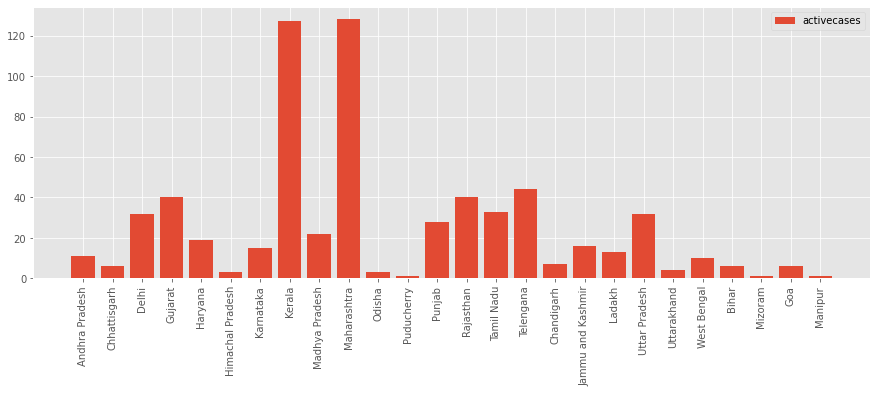

In [15]:
plt.figure(figsize=(15,5))
plt.bar(x,y, label='activecases')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [16]:
df.iplot(kind='bar',x='Name of State / UT',y='Remaining_ActiveTotal')

In [17]:
df.iplot(kind='scatter',x='Name of State / UT',y='Remaining_ActiveTotal',xTitle='State',yTitle='Cases',mode='lines+markers')

In [18]:
dfc=pd.read_excel(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\Indian Coordinates.xlsx')

In [19]:
dfc.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [20]:
dffull=pd.merge(dfc,df,on='Name of State / UT')

In [21]:
dffull.head(5)

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Remaining_ActiveTotal
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [22]:
dfind=pd.read_excel(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='India')

In [23]:
dfind.head(4)

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN


In [24]:
dfitaly=pd.read_excel(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dfwuhan=pd.read_excel(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')
dfKorea=pd.read_excel(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')

In [25]:
dfitaly.head(3)

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN


In [26]:
dfKorea.head(3)

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN


(array([737456., 737463., 737470., 737477., 737485., 737492., 737499.,
        737506.]),
 <a list of 8 Text major ticklabel objects>)

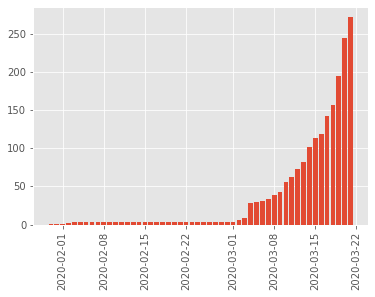

In [27]:
plt.bar(dfind['Date'],dfind['Total Cases'])
plt.xticks(rotation=90)

In [28]:
fig=px.bar(dfind,x="Date",y='Total Cases',color='Total Cases',title='Cases in IND')
fig.show()

In [29]:
fig=px.bar(dfitaly,x="Date",y='Total Cases',color='Total Cases',title='Cases in ITALY')
fig.show()
fig=px.bar(dfwuhan,x='Date',y='Total Cases',color='Total Cases',title='Cases in Wuhan')
fig.show()
fig=px.bar(dfKorea,x="Date",y='Total Cases',color='Total Cases',title='Cases in KOREA')
fig.show()

# subplots

In [30]:
from plotly.subplots import make_subplots

In [31]:
fig=make_subplots(rows=2,cols=2,shared_xaxes=True,
                 subplot_titles=('IND','Italy','Wuhan','Korea'))

fig.add_trace(go.Bar(x=dfind['Date'],y=dfind['Total Cases']),row=1,col=1)
fig.add_trace(go.Bar(x=dfitaly['Date'],y=dfitaly['Total Cases']),row=1,col=2)
fig.add_trace(go.Bar(x=dfwuhan['Date'],y=dfwuhan['Total Cases']),row=2,col=1)
fig.add_trace(go.Bar(x=dfKorea['Date'],y=dfKorea['Total Cases']),row=2,col=2)

# World map Corona

In [32]:
dfw=pd.read_csv(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\covid_19_data.csv',
                parse_dates=['Last Update'])
dfw.rename(columns={'ObservationDate':'Date','Country/Region':'country'},inplace=True)

In [33]:
dfw.head()

,SNo,Date,Province/State,country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [34]:
dfw.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [35]:
confirmed=dfw.groupby('Date').sum()['Confirmed'].reset_index()
deaths=dfw.groupby('Date').sum()["Deaths"].reset_index()
Recovered=dfw.groupby('Date').sum()['Recovered'].reset_index()




In [40]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed cases'))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='Death cases'))
fig.add_trace(go.Scatter(x=Recovered['Date'],y=Recovered['Recovered'],mode='lines+markers',name='Recovered cases'))


In [95]:
dfm=pd.read_csv(r'C:\Users\HP\Desktop\covid\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\time_series_covid_19_confirmed.csv')

In [101]:
dfm.head(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [106]:
dfm.rename(columns={'Country/Region':'country'},inplace=True)

In [107]:
dfn=pd.merge(dfw,dfm,on=['Province/State','country'])

In [109]:
dfn.head(2)

,SNo,Date,Province/State,country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [116]:
fg=px.density_mapbox(dfn,lat='Lat',lon='Long',hover_name='Province/State',hover_data=['Confirmed','Deaths','Recovered'],
                     animation_frame='Date',color_continuous_scale='Portland',radius=7,zoom=0,height=500)

fg.update_layout(title='World wide cases')
fg.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fg.update_layout(margin={'r':0,'t':0,'l':0,'b':0})